<a href="https://colab.research.google.com/github/Tanisha2626/Analysis_of_taxi_Industry_in_NYC/blob/main/Analysis_on_Taxi_Industry1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d fivethirtyeight/uber-pickups-in-new-york-city
!mkdir dataset
!unzip /content/uber-pickups-in-new-york-city.zip -d dataset
!rm /content/uber-pickups-in-new-york-city.zip
!rm /content/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 92% 100M/109M [00:01<00:00, 61.5MB/s] 
100% 109M/109M [00:01<00:00, 85.1MB/s]
mkdir: cannot create directory ‘dataset’: File exists
Archive:  /content/uber-pickups-in-new-york-city.zip
  inflating: dataset/Uber-Jan-Feb-FOIL.csv  
  inflating: dataset/other-American_B01362.csv  
  inflating: dataset/other-Carmel_B00256.csv  
  inflating: dataset/other-Dial7_B00887.csv  
  inflating: dataset/other-Diplo_B01196.csv  
  inflating: dataset/other-FHV-services_jan-aug-2015.csv  
  inflating: dataset/other-Federal_02216.csv  
  inflating: dataset/other-Firstclass_B01536.csv  
  inflating: dataset/other-Highclass_B01717.csv  
  inflating: dataset/other-Lyft_B02510.csv  
  inflating: dataset/other-Prestige_B01338.csv  
  inflating: dataset/other-Skyline_B00111.csv  
  inflating: dataset/uber-raw-data-apr14.csv  
  inflating: dataset/uber-raw-data-aug14.csv  
  inflating: dataset/uber-raw-data-janjune-15.csv  
  inflating: dataset/uber-

#Exploratory Data Analysis

In [ ]:
!pip install datashader

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datashader as ds
import colorcet as cc
%matplotlib inline

###Experiment 1

          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
Number of Pickups: 4500872


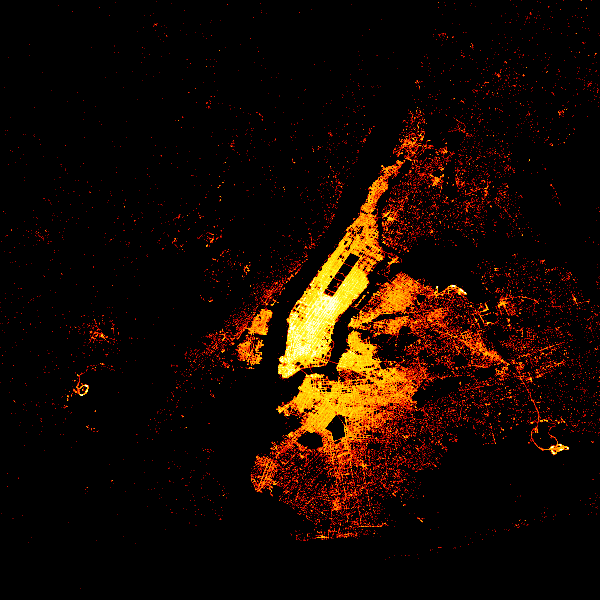

In [ ]:
pickups_1 = pd.read_csv('/content/dataset/uber-raw-data-apr14.csv')
pickups_2 = pd.read_csv('/content/dataset/uber-raw-data-may14.csv')
pickups_3 = pd.read_csv('/content/dataset/uber-raw-data-jun14.csv')
pickups_4 = pd.read_csv('/content/dataset/uber-raw-data-jul14.csv')
pickups_6 = pd.read_csv('/content/dataset/uber-raw-data-sep14.csv')
pickups_5 = pd.read_csv('/content/dataset/uber-raw-data-aug14.csv')
pickups = pickups_1.append(pickups_2.append(pickups_3.append(pickups_4.append(pickups_5.append(pickups_6)))))

print(pickups.head())
pickups_focused = pickups[
    pickups['Lon'].between(-74.25, -73.75) &
    pickups['Lat'].between(40.5, 41)
]
print('Number of Pickups: {}'.format(len(pickups_focused)))

pickup_points = ds.Canvas().points(pickups_focused, 'Lon', 'Lat', )
ds.tf.set_background(ds.tf.shade(pickup_points, cmap=cc.fire), "black")

###Experiment 2

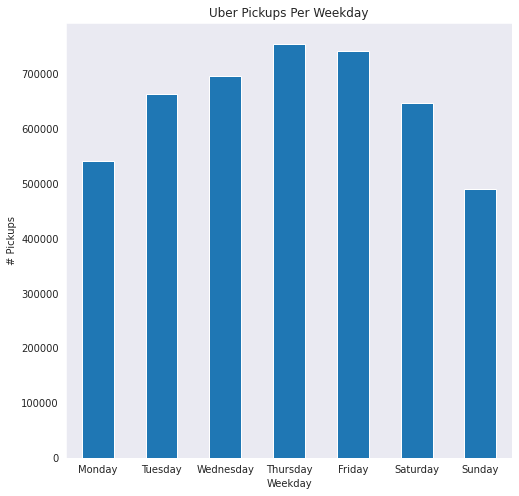

In [ ]:
plt.figure(figsize = (8,8))
pickups['Date/Time'] = pd.to_datetime(pickups['Date/Time'])
pickups['Weekday'] = pickups['Date/Time'].dt.dayofweek
weekday_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
pickups['Weekday'] = pickups['Weekday'].replace(weekday_map)
weekday_pickups = pickups['Weekday'].value_counts()[weekday_map.values()]

weekday_pickups.plot(kind='bar', rot=0)
plt.title('Uber Pickups Per Weekday')
plt.xlabel('Weekday')
plt.ylabel('# Pickups');

###Experiment 3

,Date/Time,Lat,Lon,Base,Weekday,HourOfDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,Tuesday,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,Tuesday,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,Tuesday,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,Tuesday,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,Tuesday,0
...,...,...,...,...,...,...
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,Wednesday,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,Wednesday,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,Wednesday,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,Wednesday,23


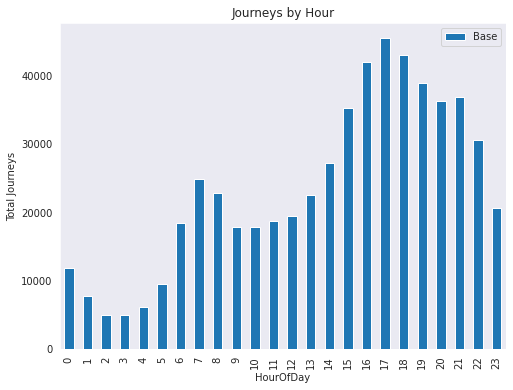

In [ ]:
pickups['HourOfDay'] = pickups['Date/Time'].dt.hour
display(pickups)
uber_hour = pickups.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')

uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour');

###Experiment 4

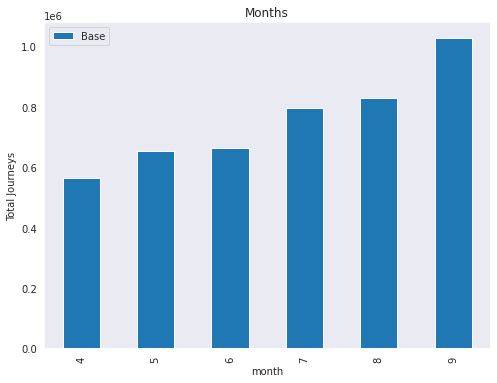

In [ ]:
pickups['month'] = pickups['Date/Time'].dt.month
uber_hour = pickups.pivot_table(index=['month'],
                                  values='Base',
                                  aggfunc='count')

uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Months');

# ARIMA Models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uber_2014_apr=pd.read_csv('/content/dataset/uber-raw-data-apr14.csv',header=0)
uber_2014_may=pd.read_csv('/content/dataset/uber-raw-data-may14.csv',header=0)
uber_2014_jun=pd.read_csv('/content/dataset/uber-raw-data-jun14.csv',header=0)
uber_2014_jul=pd.read_csv('/content/dataset/uber-raw-data-jul14.csv',header=0)
uber_2014_aug=pd.read_csv('/content/dataset/uber-raw-data-aug14.csv',header=0)
uber_2014_sep=pd.read_csv('/content/dataset/uber-raw-data-sep14.csv',header=0)
uber_2014_master = uber_2014_apr.append([uber_2014_may,uber_2014_jun,uber_2014_jul,uber_2014_aug,uber_2014_sep], ignore_index=True)
uber_2014_master.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [ ]:
def create_day_series(df):
    day_df = pd.Series(df.groupby(['Date/Time']).size())
    day_df.index = pd.DatetimeIndex(day_df.index)
    day_df = day_df.resample('1D').apply(np.sum)
    return day_df

day_df_2014 = create_day_series(uber_2014_master)
day_df_2014.head()

Date/Time
2014-04-01    14546
2014-04-02    17474
2014-04-03    20701
2014-04-04    26714
2014-04-05    19521
Freq: D, dtype: int64

p-value: 0.8458980824898367


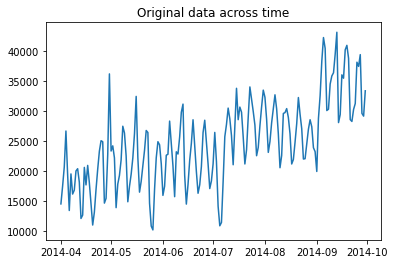

<Figure size 432x288 with 0 Axes>

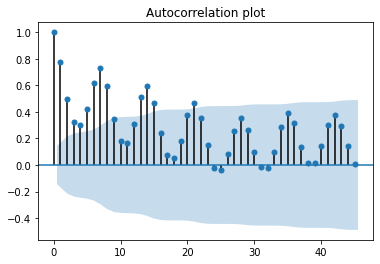

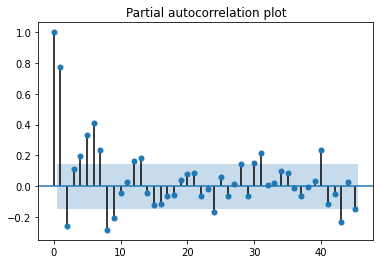

In [ ]:
def initial_plots(time_series, num_lag):
    plt.figure(1)
    plt.plot(time_series)
    plt.title('Original data across time')
    plt.figure(2)
    plot_acf(time_series, lags = num_lag)
    plt.title('Autocorrelation plot')
    plot_pacf(time_series, lags = num_lag)
    plt.title('Partial autocorrelation plot')
    plt.show()
print('p-value: {}'.format(adfuller(day_df_2014)[1]))
initial_plots(day_df_2014, 45)

<Figure size 1600x800 with 0 Axes>

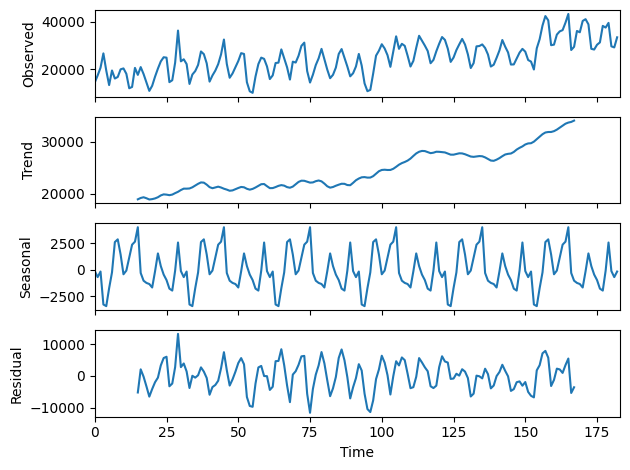

In [ ]:
plt.style.use('default')
plt.figure(figsize = (16,8))
sm.tsa.seasonal_decompose(day_df_2014.values,freq=30).plot()
plt.show()

In [ ]:
diff_series = day_df_2014.diff(periods=1)
print('p-value: {}'.format(adfuller(diff_series.dropna())[1]))

p-value: 1.5163641177435116e-08


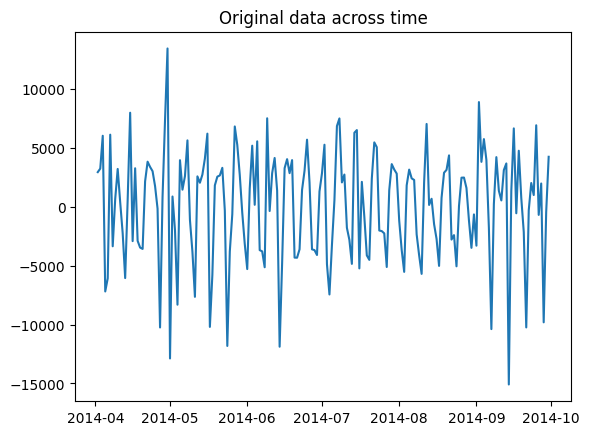

<Figure size 640x480 with 0 Axes>

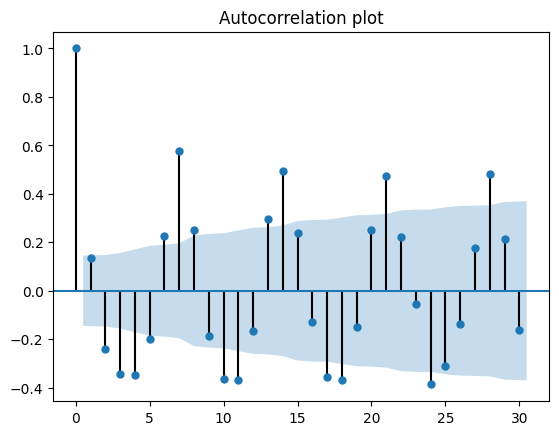

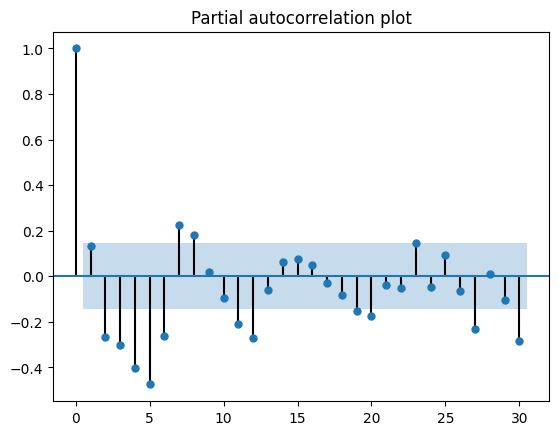

In [ ]:
initial_plots(diff_series.dropna(), 30)

In [ ]:
def rmse(x,y):
    return sqrt(mean_squared_error(x,y))


def SARIMAX_call(time_series,p_list,d_list,q_list,P_list,D_list,Q_list,s_list,test_period):


    training_ts = time_series[:-test_period]

    testing_ts = time_series[len(time_series)-test_period:]

    error_table = pd.DataFrame(columns = ['p','d','q','P','D','Q','s','AIC','BIC','RMSE'],\
                                                           index = range(len(ns_ar)*len(ns_diff)*len(ns_ma)*len(s_ar)\
                                                                         *len(s_diff)*len(s_ma)*len(s_list)))
    count = 0

    for p in p_list:
        for d in d_list:
            for q in q_list:
                for P in P_list:
                    for D in D_list:
                        for Q in Q_list:
                            for s in s_list:

                                SARIMAX_model = SARIMAX(training_ts.astype(float),\
                                                        order=(p,d,q),\
                                                        seasonal_order=(P,D,Q,s),\
                                                        enforce_invertibility=False)
                                SARIMAX_model_fit = SARIMAX_model.fit(disp=0)
                                AIC = np.round(SARIMAX_model_fit.aic,2)
                                BIC = np.round(SARIMAX_model_fit.bic,2)
                                predictions = SARIMAX_model_fit.forecast(steps=test_period,typ='levels')
                                RMSE = rmse(testing_ts.values,predictions.values)


                                error_table['p'][count] = p
                                error_table['d'][count] = d
                                error_table['q'][count] = q
                                error_table['P'][count] = P
                                error_table['D'][count] = D
                                error_table['Q'][count] = Q
                                error_table['s'][count] = s
                                error_table['AIC'][count] = AIC
                                error_table['BIC'][count] = BIC
                                error_table['RMSE'][count] = RMSE

                                count+=1


    return error_table

ns_ar = [0,1,2]
ns_diff = [1]
ns_ma = [0,1,2]
s_ar = [0,1]
s_diff = [0,1]
s_ma = [1,2]
s_list = [7]

error_table = SARIMAX_call(day_df_2014,ns_ar,ns_diff,ns_ma,s_ar,s_diff,s_ma,s_list,30)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

In [ ]:
error_table.sort_values(by='RMSE').head(5)

,p,d,q,P,D,Q,s,AIC,BIC,RMSE
5,0,1,0,1,0,2,7,2903.3,2915.4,5060.06
3,0,1,0,0,1,2,7,2752.78,2761.71,5105.3
7,0,1,0,1,1,2,7,2754.8,2766.7,5136.57
6,0,1,0,1,1,1,7,2754.5,2763.43,5278.11
2,0,1,0,0,1,1,7,2752.71,2758.66,5336.34


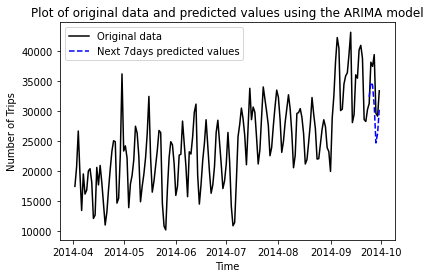

In [ ]:
from datetime import timedelta

def predict(time_series,p,d,q,P,D,Q,s,n_days,conf):
    training_ts = time_series[:-n_days]
    testing_ts = time_series[len(time_series)-n_days:]
    SARIMAX_model = SARIMAX(training_ts.astype(float),\
                            order=(p,d,q),\
                            seasonal_order=(P,D,Q,s),\
                            enforce_invertibility=False)
    SARIMAX_model_fit = SARIMAX_model.fit(disp=0)
    SARIMAX_prediction = pd.DataFrame(SARIMAX_model_fit.forecast(steps=n_days,alpha=(1-conf)).values,\
                          columns=['Prediction'])
    SARIMAX_prediction.index = pd.date_range(training_ts.index.max()+timedelta(days=1),periods=n_days)
    plt.figure(4)
    plt.title('Plot of original data and predicted values using the ARIMA model')
    plt.xlabel('Time')
    plt.ylabel('Number of Trips')
    plt.plot(time_series[1:],'k-', label='Original data')
    plt.plot(SARIMAX_prediction,'b--', label='Next {}days predicted values'.format(n_days))
    plt.legend()
    plt.show()
    return SARIMAX_prediction
prediction = predict(day_df_2014,0,1,0,0,1,2,7,7,0.80)

# RNN/LSTM Models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from datetime import datetime
from collections import Counter

from pandas.plotting import autocorrelation_plot as acp
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uber_jan_june = pd.read_csv('/content/dataset/uber-raw-data-janjune-15.csv')
print (uber_jan_june.head())
uber_jan_june.shape

  Dispatching_base_num          Pickup_date Affiliated_base_num  locationID
0               B02617  2015-05-17 09:47:00              B02617         141
1               B02617  2015-05-17 09:47:00              B02617          65
2               B02617  2015-05-17 09:47:00              B02617         100
3               B02617  2015-05-17 09:47:00              B02774          80
4               B02617  2015-05-17 09:47:00              B02617          90


(14270479, 4)

In [ ]:
uber_jan_june['Month_Day'] = uber_jan_june['Pickup_date'].apply(lambda pickup: datetime.strptime(pickup, '%Y-%m-%d %H:%M:%S').strftime('%m-%d').split('-'))

In [ ]:
uber_jan_june['Month'] = [month_day [0] for month_day in uber_jan_june['Month_Day']]
uber_jan_june['Day'] = [month_day [1] for month_day in uber_jan_june['Month_Day']]
uber_jan_june.tail(20)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Month_Day,Month,Day
14270459,B02765,2015-05-08 15:40:00,B02765,186,"[05, 08]",05,08
14270460,B02765,2015-05-08 15:41:00,B02764,50,"[05, 08]",05,08
14270461,B02765,2015-05-08 15:41:00,B02253,13,"[05, 08]",05,08
14270462,B02765,2015-05-08 15:41:00,B02682,192,"[05, 08]",05,08
14270463,B02765,2015-05-08 15:41:00,B02345,262,"[05, 08]",05,08
14270464,B02765,2015-05-08 15:41:00,B02765,237,"[05, 08]",05,08
14270465,B02765,2015-05-08 15:41:00,B02765,233,"[05, 08]",05,08
14270466,B02765,2015-05-08 15:41:00,B02765,148,"[05, 08]",05,08
14270467,B02765,2015-05-08 15:41:00,B02765,33,"[05, 08]",05,08
14270468,B02765,2015-05-08 15:42:00,B02096,232,"[05, 08]",05,08


In [ ]:
jan_june_grouped = uber_jan_june.groupby(by = ['Month', 'Day']).size().unstack()
jan_june_grouped

Day,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01,58045.0,40287.0,59844.0,41943.0,43678.0,53539.0,63375.0,73016.0,72124.0,80656.0,58751.0,58991.0,64765.0,64725.0,68211.0,74193.0,75364.0,74523.0,47025.0,55867.0,60383.0,66819.0,73363.0,82588.0,59382.0,44310.0,25954.0,61626.0,70441.0,85565.0,94448.0
02,78592.0,70193.0,71532.0,68237.0,82336.0,87568.0,82752.0,64327.0,63306.0,66197.0,73742.0,84751.0,99897.0,102347.0,91320.0,73672.0,74221.0,73493.0,90271.0,102762.0,100481.0,67844.0,72494.0,80520.0,75992.0,84840.0,90217.0,89716.0,NaN,NaN,NaN
03,70839.0,57460.0,75048.0,71931.0,77446.0,83134.0,81468.0,61824.0,53920.0,72185.0,65315.0,74038.0,79272.0,90956.0,63421.0,54824.0,62886.0,70384.0,75839.0,95273.0,80745.0,69337.0,60498.0,64400.0,73953.0,78552.0,84977.0,92527.0,75648.0,62780.0,78893.0
04,69223.0,74069.0,75983.0,69189.0,58357.0,53565.0,68079.0,72023.0,77520.0,81439.0,82547.0,67726.0,56655.0,63393.0,66534.0,78808.0,83855.0,94196.0,78107.0,78076.0,68712.0,82124.0,92110.0,99688.0,106270.0,88673.0,64783.0,68863.0,75940.0,84330.0,NaN
05,92329.0,104978.0,80300.0,65447.0,76195.0,80447.0,87361.0,90733.0,98359.0,80146.0,70310.0,78437.0,84937.0,93624.0,99756.0,121557.0,94322.0,76414.0,85371.0,91062.0,95146.0,85771.0,78343.0,68328.0,59748.0,72820.0,88662.0,95074.0,98200.0,104429.0,96947.0
06,93499.0,97592.0,87206.0,95023.0,101922.0,101773.0,88876.0,76899.0,82463.0,87403.0,102013.0,103052.0,101170.0,90856.0,85857.0,89171.0,93706.0,99842.0,101703.0,101667.0,89285.0,75418.0,93172.0,91388.0,100073.0,99508.0,136193.0,93108.0,74430.0,82627.0,NaN


In [ ]:
all_jan_june = [jan_june_grouped.iloc[r,:] for r in range(jan_june_grouped.shape[0])]
all_jan_june = [trips for month in all_jan_june for trips in month]
len(all_jan_june)

186

In [ ]:
remove_inds = list(np.argwhere(np.isnan(all_jan_june) == True).reshape((1,5))[0])
all_jan_june_mod = [all_jan_june[i] for i,j in enumerate(all_jan_june) if i not in remove_inds]

In [ ]:
uber_jan_june_final = pd.DataFrame({'Days': range(1,len(all_jan_june_mod)+1), 'Trips': all_jan_june_mod})
uber_jan_june_final.head()

,Days,Trips
0,1,58045.0
1,2,40287.0
2,3,59844.0
3,4,41943.0
4,5,43678.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
train_jan_june = uber_jan_june_final.iloc[0:167,1:2].values
test_jan_june = uber_jan_june_final.iloc[167:,1:2].values
print ('Training data: ', train_jan_june.shape)
print ('Testing data: ', test_jan_june.shape)
mms = MinMaxScaler(feature_range = (0,1))
train_jan_june_scaled = mms.fit_transform(train_jan_june)

Training data:  (167, 1)
Testing data:  (14, 1)


In [ ]:
x_train = []
y_train = []
for rides in range(14, 167):
    x_train.append(train_jan_june_scaled[rides-14:rides,0])
    y_train.append(train_jan_june_scaled[rides,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, newshape = (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import GridSearchCV

In [ ]:
np.random.seed(11)
t_start = time.time()
def build_rnn(num_units, input_x, input_y, drpout, epochs, size_of_batch, optimizer, loss):
    regressor = Sequential()
    regressor.add(LSTM(units = num_units, return_sequences = True, input_shape = (input_x.shape[1],1)))
    regressor.add(Dropout(drpout))
    regressor.add(LSTM(units = num_units, return_sequences = True))
    regressor.add(Dropout(drpout))
    regressor.add(LSTM(units = num_units, return_sequences = True))
    regressor.add(Dropout(drpout))
    regressor.add(LSTM(units = num_units, return_sequences = True))
    regressor.add(Dropout(drpout))
    regressor.add(LSTM(units = num_units, return_sequences = False))
    regressor.add(Dropout(drpout))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = optimizer, loss = loss)
    regressor.fit(x = input_x, y = input_y, epochs = epochs, batch_size = size_of_batch)
    return regressor

regressor = build_rnn(num_units = 40, input_x = x_train, input_y = y_train, drpout = 0.2, epochs = 1000, size_of_batch = 16, optimizer = 'adam', loss = 'mean_squared_error')
print (time.time() - t_start)

Epoch 1/1000
10/10 [==============================] - 9s 35ms/step - loss: 0.1839
Epoch 2/1000
10/10 [==============================] - 0s 35ms/step - loss: 0.0410
Epoch 3/1000
10/10 [==============================] - 0s 38ms/step - loss: 0.0326
Epoch 4/1000
10/10 [==============================] - 0s 37ms/step - loss: 0.0283
Epoch 5/1000
10/10 [==============================] - 0s 36ms/step - loss: 0.0269
Epoch 6/1000
10/10 [==============================] - 0s 36ms/step - loss: 0.0257
Epoch 7/1000
10/10 [==============================] - 0s 37ms/step - loss: 0.0222
Epoch 8/1000
10/10 [==============================] - 0s 36ms/step - loss: 0.0256
Epoch 9/1000
10/10 [==============================] - 0s 38ms/step - loss: 0.0249
Epoch 10/1000
10/10 [==============================] - 0s 35ms/step - loss: 0.0223
Epoch 11/1000
10/10 [==============================] - 0s 37ms/step - loss: 0.0237
Epoch 12/1000
10/10 [==============================] - 0s 36ms/step - loss: 0.0241
Epoch 13/1000

In [ ]:
adjusted_inputs = uber_jan_june_final[len(uber_jan_june_final) - len(test_jan_june) - 14:]['Trips'].values
adjusted_inputs = adjusted_inputs.reshape(-1,1)
adjusted_inputs = mms.transform(adjusted_inputs)
adjusted_inputs[0:10]

array([[0.64069119],
       [0.72245641],
       [0.79461942],
       [0.79306089],
       [0.65815926],
       [0.53288077],
       [0.59107978],
       [0.6427518 ],
       [0.79557127],
       [0.80643913]])

In [ ]:
x_test = []
for rides in range(14,29):
    x_test.append(adjusted_inputs[rides-14:rides,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, newshape = (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(15, 14, 1)

In [ ]:
pred = regressor.predict(x_test)
pred = mms.inverse_transform(pred)
residuals = pred[0:-1] - test_jan_june
rmse = np.sqrt(np.mean(residuals**2))
rmse

13522.197652069723

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


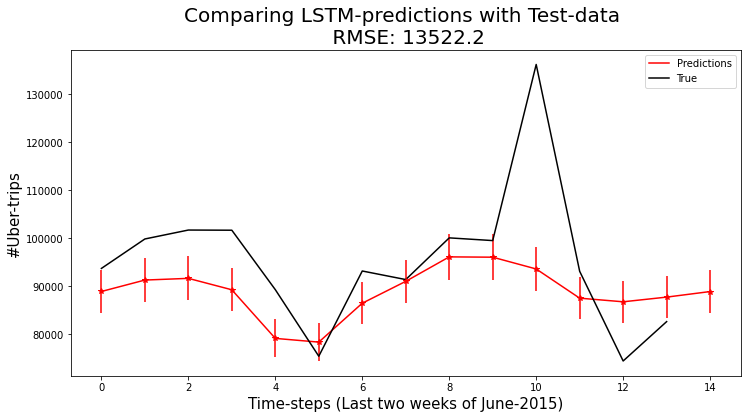

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
e = [i*0.05 for i in pred]
ax.plot(pred, color = 'red', label = 'Predictions')
ax.errorbar(x = range(15), y = pred, yerr = e, fmt = '*', color = 'r')
ax.plot(test_jan_june, color = 'black', label = 'True')
ax.set_xlabel('Time-steps (Last two weeks of June-2015)', fontsize = 15)
ax.set_ylabel('#Uber-trips', fontsize = 15)
ax.set_title('Comparing LSTM-predictions with Test-data \n RMSE: {}'.format(np.round(rmse,2)), fontsize = 20)
ax.legend()
plt.show()

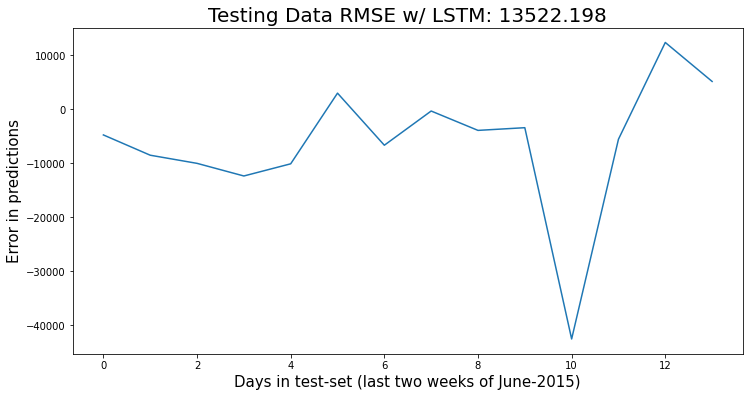

In [ ]:
fig ,ax = plt.subplots(figsize = (12,6))
ax.plot(residuals)
ax.set_xlabel('Days in test-set (last two weeks of June-2015)', fontsize = 15)
ax.set_ylabel('Error in predictions', fontsize = 15)
ax.set_title('Testing Data RMSE w/ LSTM: {}'.format(round(rmse, 3)), fontsize = 20)
plt.show()

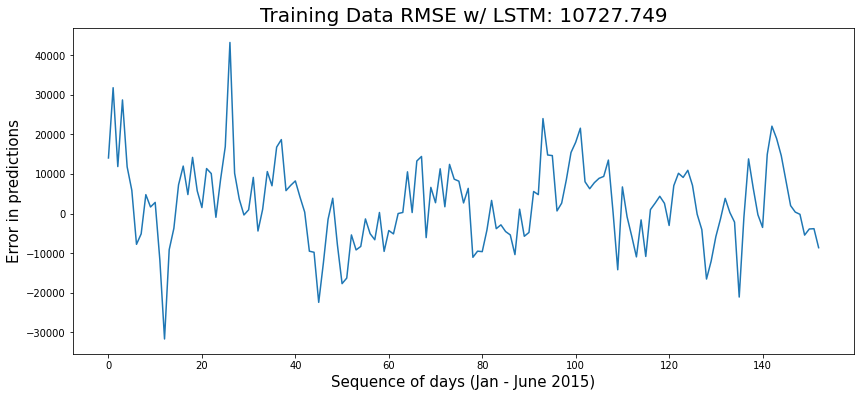

In [ ]:
pred_train = regressor.predict(x_train)
pred_train = mms.inverse_transform(pred_train)
residuals_train = pred_train - train_jan_june[0:-14]
rmse_train = np.sqrt(np.mean(residuals_train**2))
fig, ax = plt.subplots(figsize = (14,6))
ax.plot(residuals_train)
ax.set_xlabel('Sequence of days (Jan - June 2015)', fontsize = 15)
ax.set_ylabel('Error in predictions', fontsize = 15)
ax.set_title('Training Data RMSE w/ LSTM: {}'.format(round(rmse_train,3)), fontsize = 20)
plt.show()

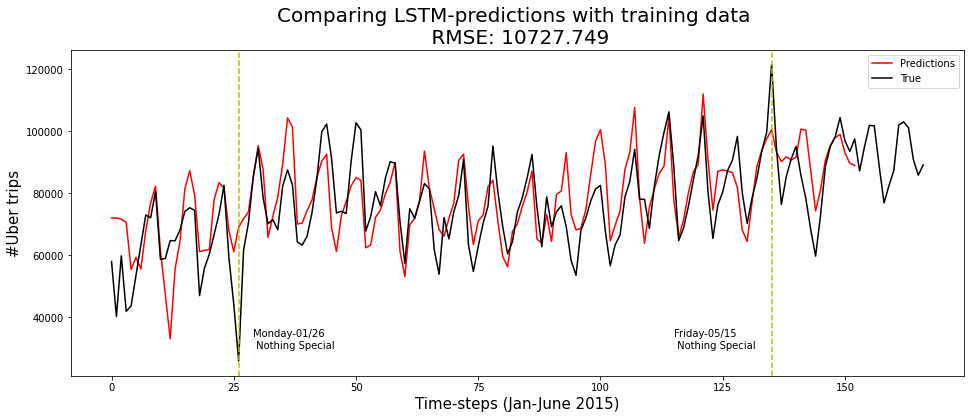

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))
ax.plot(pred_train, color = 'red', label = 'Predictions')
ax.plot(train_jan_june, color = 'black', label = 'True')
ax.axvline(x = 26, color = 'y', linestyle = 'dashed')
ax.text(x = 29, y = 30000, s = 'Monday-01/26 \n Nothing Special')
ax.axvline(x = 135, color = 'y', linestyle = 'dashed')
ax.text(x = 115, y = 30000, s = 'Friday-05/15 \n Nothing Special')
ax.set_xlabel('Time-steps (Jan-June 2015)', fontsize = 15)
ax.set_ylabel('#Uber trips', fontsize = 15)
ax.set_title('Comparing LSTM-predictions with training data \n RMSE: {}'.format(round(rmse_train,3)), fontsize = 20)
ax.legend()
plt.show()

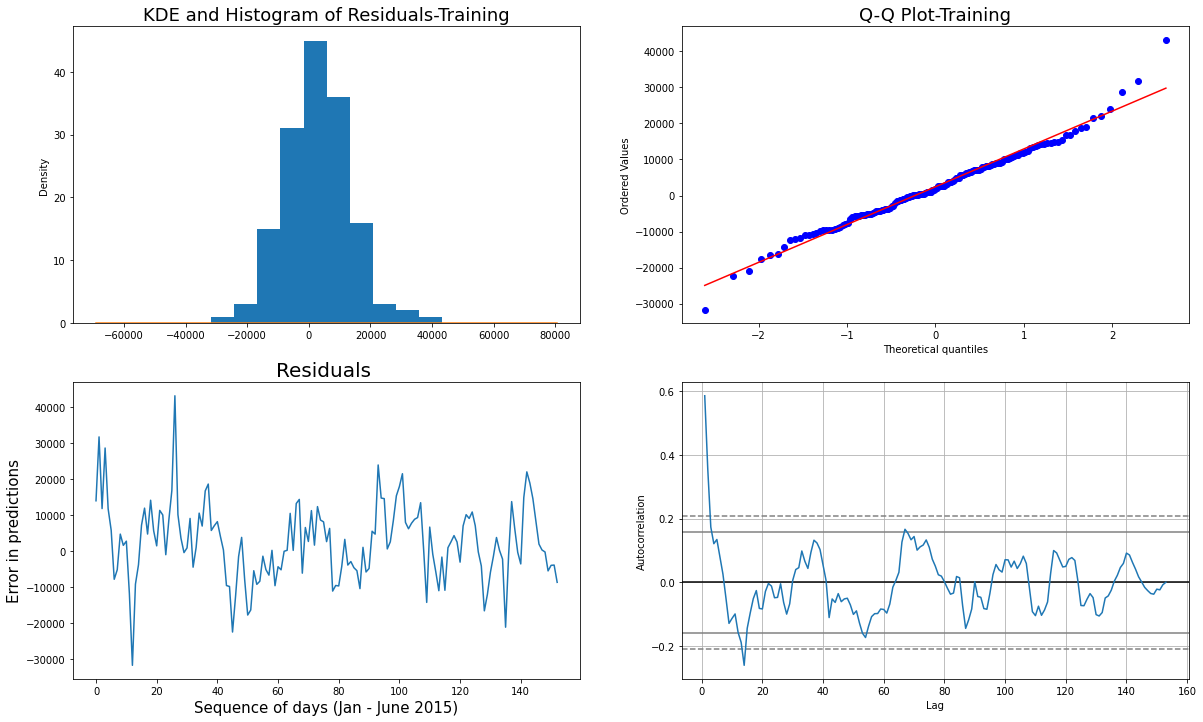

In [ ]:
import matplotlib.gridspec as gridspec
plt.figure(figsize = (20,12))
g = gridspec.GridSpec(2,2)
ax1 = plt.subplot(g[0,0])
ax1.hist(residuals_train)
pd.DataFrame(residuals_train).plot(kind = 'kde', ax = ax1, label = 'KDE')
ax1.set_title('KDE and Histogram of Residuals-Training', fontsize = 18)
ax1.legend_.remove()
ax2 = plt.subplot(g[0,1])
import scipy.stats as ss
ss.probplot(residuals_train[:,0].tolist(), plot = ax2)
ax2.set_title('Q-Q Plot-Training', fontsize = 18)
ax3 = plt.subplot(g[1,0])
ax3.plot(residuals_train)
ax3.set_xlabel('Sequence of days (Jan - June 2015)', fontsize = 15)
ax3.set_ylabel('Error in predictions', fontsize = 15)
ax3.set_title('Residuals ', fontsize = 20)
ax4 = plt.subplot(g[1,1])
acp(residuals_train, ax = ax4)
plt.show()